# Coordinate descent

Consider a standard unconstrained optimization problem:
\begin{equation}\label{eq:1}
min\, L(w)
\end{equation}

where L is some cost function and $w \in R^d$. There are several approaches to solving such problems-such as gradient descent and stochastic gradient descent-under differentiability conditions on
L(w).Now let's look at a different, and in many ways simpler, approach:
\begin{itemize}
\item Initialize $w$ somehow.
\item Repeat: pick a coordinate $i \in {1, 2, ..., d}$, and update the value of $w_i$ so as to reduce the loss.
\end{itemize}

Two questions need to be answered in order to fully specify the updates:
\begin{itemize}
\item Which coordinate to choose?
\item How to set the new value of $w_i$?
\end{itemize} 

Implement and test on a logistic regression problem. Data: https://archive.ics.uci.edu/ml/datasets/Wine This contains 178 data points in 13 dimensions, with 3 classes. Just keep the first two classes (with 59 and 71 points, respectively) so as to create a binary problem.

# Method Description

Firstly, the coordinate was selected circularly in each iteration, which means in order from 1, 2, ...,d + 1, 1, 2, .... Then $w_i$ was updated by following the rule as below.
\begin{equation}\label{eq:2}
w_i = argmin_W\, L(w_1, ..., w_{i-1}, W, w_{i+1}, ..., w_{d+1})
\end{equation}

In particular, each argmin subproblem here was solved with Newton method by finding continuous second-order derivatives. To guarantee that the method converges to the optimal solution, L(w) needs to be a convex smooth function or consists of a convex smooth function plus a convex separable function, which corresponds to the regularization term that could present possibly. Therefore, if encountering a cost function with $l_1$ or $l_2$ regularization term, the subproblem above could not be solved exactly but approximately by employing line search with one-dimensional Newton direction.

Due to that the loss would continuously decrease following the iterations, a proper and quite small
difference value between the loss of the last and current iteration could be set as a threshold to determine whether converged or not. 0.0001 was used here.

# Implementation
## Import libraries & data preprocessing

In [1]:
import numpy as np
from random import shuffle, randint, uniform
from sklearn.linear_model import LogisticRegression
from scipy.optimize import newton, fmin_l_bfgs_b
from sklearn.preprocessing import normalize

with open('wine.data.txt') as f:
    content = f.read().splitlines()
    content = [map(float, line.split(',')) for line in content]

data = content[0:130]
shuffle(data)
x = []
y = []
for d in data:
    x.append(d[1:])
    if d[0] == 2:
        y.append(-1)
    else:
        y.append(d[0])
        
x_1 = []
for d in data:
    x_1.append([1] + d[1:])

## Standard LR Solver(CD)

In [2]:
lr = LogisticRegression(C=np.power(10,18))
lr.fit(x, y)
w = lr.coef_
b = lr.intercept_
w_hat = np.append(b, w)

In [3]:
def loss(x, y, w):
    l = 0
    for i in xrange(0, len(x)):
        l += np.log(np.exp(-y[i] * w.dot(x[i])) + 1)
    return l

L_aster = loss(x_1, y, w_hat)
print L_aster

3.14004931448


## Random-feature CDN

In [4]:
def loss_f(w_j, X, y, w, j):
    res = 0
    w[j] = 0
    for i in xrange(0, len(X)):
        res += np.exp(-y[i] * (w.dot(X[i]) + w_j * X[i][j])) / (1 + np.exp(-y[i] * (w.dot(X[i]) + w_j * X[i][j]))) * (-y[i] * X[i][j])
        
    return res

def loss_fprime(w_j, X, y, w, j):
    res = 0
    w[j] = 0
    for i in xrange(0, len(X)):
        res += (y[i] * X[i][j])**2 * np.exp(-y[i] * (w.dot(X[i]) + w_j * X[i][j]))
        
    return res

In [5]:
w_b = np.array([0]*len(x_1[0]),dtype=np. float)

diff = loss(x_1, y, w_b) - L_aster
t1 = 0
L_rand = [loss(x_1, y, w_b)]
while(diff > 0.0001):   
    j = randint(0, len(x_1[0]) - 1)
    w_b[j] = newton(loss_f, w_b[j], loss_fprime, args = (x_1, y, w_b, j), maxiter=100) 
    L_rand.append(loss(x_1, y, w_b))
    diff = loss(x_1, y, w_b) - L_aster
    t1 += 1
    print "Loss = " + str(loss(x_1, y, w_b)) + "; iteration = " + str(t1)
    
    #w2[j],_,_ = fmin_l_bfgs_b(loss_lbfgs, w2[j], loss_f, args = (x2, y, w2, j))
    #print "w_j = " + str(w2[j]) + "; j = " + str(j) + "; w = " + str(w_b)

Loss = 89.9637753369; iteration = 1
Loss = 83.9757555196; iteration = 2
Loss = 79.0034008619; iteration = 3
Loss = 79.0034008619; iteration = 4
Loss = 77.2179742145; iteration = 5
Loss = 73.586320018; iteration = 6
Loss = 73.4711044687; iteration = 7
Loss = 73.4677852446; iteration = 8
Loss = 73.4478728674; iteration = 9
Loss = 72.9950183977; iteration = 10
Loss = 72.8150184907; iteration = 11
Loss = 71.1358699631; iteration = 12
Loss = 71.1046513583; iteration = 13
Loss = 69.8155087475; iteration = 14
Loss = 69.8151894619; iteration = 15
Loss = 69.7050829598; iteration = 16
Loss = 69.5469385103; iteration = 17
Loss = 68.1973047792; iteration = 18
Loss = 66.9655618289; iteration = 19
Loss = 65.7253850953; iteration = 20
Loss = 65.6005265347; iteration = 21
Loss = 65.4790535726; iteration = 22
Loss = 65.3515328424; iteration = 23
Loss = 65.3515328424; iteration = 24
Loss = 65.2350007432; iteration = 25
Loss = 65.1362855185; iteration = 26
Loss = 63.5236965864; iteration = 27
Loss = 63.2

Loss = 16.9682981449; iteration = 222
Loss = 16.8348511011; iteration = 223
Loss = 16.8348511011; iteration = 224
Loss = 16.8050730073; iteration = 225
Loss = 16.7927376281; iteration = 226
Loss = 16.7927376263; iteration = 227
Loss = 16.5435201088; iteration = 228
Loss = 16.2629883627; iteration = 229
Loss = 16.2617863721; iteration = 230
Loss = 16.1846237904; iteration = 231
Loss = 16.1843069807; iteration = 232
Loss = 16.1606620942; iteration = 233
Loss = 16.1485376384; iteration = 234
Loss = 16.0865123354; iteration = 235
Loss = 16.0865123354; iteration = 236
Loss = 15.9965771142; iteration = 237
Loss = 15.9119464202; iteration = 238
Loss = 15.8625114325; iteration = 239
Loss = 15.8625114325; iteration = 240
Loss = 15.8184094419; iteration = 241
Loss = 15.8172853285; iteration = 242
Loss = 15.7865462722; iteration = 243
Loss = 15.7605537083; iteration = 244
Loss = 15.6864438192; iteration = 245
Loss = 15.4058436459; iteration = 246
Loss = 15.3441140044; iteration = 247
Loss = 15.34

Loss = 10.9811656916; iteration = 441
Loss = 10.9746700334; iteration = 442
Loss = 10.9686125237; iteration = 443
Loss = 10.903846378; iteration = 444
Loss = 10.8703651131; iteration = 445
Loss = 10.8657947631; iteration = 446
Loss = 10.8652305421; iteration = 447
Loss = 10.8628625152; iteration = 448
Loss = 10.8613786424; iteration = 449
Loss = 10.8600326412; iteration = 450
Loss = 10.849083555; iteration = 451
Loss = 10.8286731741; iteration = 452
Loss = 10.8214342836; iteration = 453
Loss = 10.8158614761; iteration = 454
Loss = 10.7817237385; iteration = 455
Loss = 10.7585983538; iteration = 456
Loss = 10.755797801; iteration = 457
Loss = 10.7423862907; iteration = 458
Loss = 10.6788023809; iteration = 459
Loss = 10.5713039196; iteration = 460
Loss = 10.5595894078; iteration = 461
Loss = 10.545506974; iteration = 462
Loss = 10.4985599714; iteration = 463
Loss = 10.498559971; iteration = 464
Loss = 10.4042183822; iteration = 465
Loss = 10.391292084; iteration = 466
Loss = 10.38233124

Loss = 8.55263826491; iteration = 659
Loss = 8.54720882426; iteration = 660
Loss = 8.54372285462; iteration = 661
Loss = 8.5410061762; iteration = 662
Loss = 8.54099193208; iteration = 663
Loss = 8.53649199729; iteration = 664
Loss = 8.53648185337; iteration = 665
Loss = 8.53254261975; iteration = 666
Loss = 8.52577001342; iteration = 667
Loss = 8.52516205784; iteration = 668
Loss = 8.52511836854; iteration = 669
Loss = 8.5249171649; iteration = 670
Loss = 8.51864231101; iteration = 671
Loss = 8.47293877516; iteration = 672
Loss = 8.46478947583; iteration = 673
Loss = 8.46286060744; iteration = 674
Loss = 8.46102498712; iteration = 675
Loss = 8.4529364202; iteration = 676
Loss = 8.4329317482; iteration = 677
Loss = 8.43293174819; iteration = 678
Loss = 8.41354025439; iteration = 679
Loss = 8.41278413305; iteration = 680
Loss = 8.4004691717; iteration = 681
Loss = 8.3978569005; iteration = 682
Loss = 8.39532670773; iteration = 683
Loss = 8.39444237784; iteration = 684
Loss = 8.394384237

Loss = 7.22256540802; iteration = 877
Loss = 7.21387302399; iteration = 878
Loss = 7.21314084007; iteration = 879
Loss = 7.20389223905; iteration = 880
Loss = 7.20034511512; iteration = 881
Loss = 7.19940517282; iteration = 882
Loss = 7.19931921656; iteration = 883
Loss = 7.18920086997; iteration = 884
Loss = 7.17123849708; iteration = 885
Loss = 7.16970842929; iteration = 886
Loss = 7.16965342918; iteration = 887
Loss = 7.16026859767; iteration = 888
Loss = 7.1530645389; iteration = 889
Loss = 7.13376711453; iteration = 890
Loss = 7.13376711453; iteration = 891
Loss = 7.09903007783; iteration = 892
Loss = 7.09573218618; iteration = 893
Loss = 7.09572013145; iteration = 894
Loss = 7.09415733145; iteration = 895
Loss = 7.09264728975; iteration = 896
Loss = 7.09106757315; iteration = 897
Loss = 7.08125484159; iteration = 898
Loss = 7.07805242524; iteration = 899
Loss = 7.07776279348; iteration = 900
Loss = 7.07771020098; iteration = 901
Loss = 7.05927918818; iteration = 902
Loss = 7.0506

Loss = 6.23257276164; iteration = 1093
Loss = 6.2274577442; iteration = 1094
Loss = 6.2133388432; iteration = 1095
Loss = 6.21306429359; iteration = 1096
Loss = 6.21280733626; iteration = 1097
Loss = 6.17864832147; iteration = 1098
Loss = 6.16435600466; iteration = 1099
Loss = 6.16358997723; iteration = 1100
Loss = 6.16178019473; iteration = 1101
Loss = 6.16146663934; iteration = 1102
Loss = 6.16007660044; iteration = 1103
Loss = 6.15875017975; iteration = 1104
Loss = 6.15849193946; iteration = 1105
Loss = 6.1431039616; iteration = 1106
Loss = 6.13176623591; iteration = 1107
Loss = 6.12652472863; iteration = 1108
Loss = 6.12317159563; iteration = 1109
Loss = 6.12205019429; iteration = 1110
Loss = 6.12189158223; iteration = 1111
Loss = 6.12189158223; iteration = 1112
Loss = 6.11117580936; iteration = 1113
Loss = 6.1047994368; iteration = 1114
Loss = 6.1042728833; iteration = 1115
Loss = 6.09402091515; iteration = 1116
Loss = 6.08179421492; iteration = 1117
Loss = 6.0817942105; iteration

Loss = 5.37254553771; iteration = 1305
Loss = 5.37254084325; iteration = 1306
Loss = 5.37254084325; iteration = 1307
Loss = 5.37105326983; iteration = 1308
Loss = 5.37030973973; iteration = 1309
Loss = 5.37020979262; iteration = 1310
Loss = 5.36994470583; iteration = 1311
Loss = 5.36974476649; iteration = 1312
Loss = 5.36974097156; iteration = 1313
Loss = 5.36586830817; iteration = 1314
Loss = 5.3644160279; iteration = 1315
Loss = 5.36395340947; iteration = 1316
Loss = 5.36393651757; iteration = 1317
Loss = 5.36381564161; iteration = 1318
Loss = 5.36372325855; iteration = 1319
Loss = 5.36345159397; iteration = 1320
Loss = 5.36329518991; iteration = 1321
Loss = 5.36321706695; iteration = 1322
Loss = 5.36306720864; iteration = 1323
Loss = 5.36278649729; iteration = 1324
Loss = 5.36276052085; iteration = 1325
Loss = 5.35899393137; iteration = 1326
Loss = 5.35747257178; iteration = 1327
Loss = 5.35051310886; iteration = 1328
Loss = 5.32555531078; iteration = 1329
Loss = 5.32242203473; iter

Loss = 4.83834978156; iteration = 1516
Loss = 4.83596228717; iteration = 1517
Loss = 4.83566979249; iteration = 1518
Loss = 4.83462608467; iteration = 1519
Loss = 4.83376042254; iteration = 1520
Loss = 4.83376042254; iteration = 1521
Loss = 4.83213893669; iteration = 1522
Loss = 4.83211721079; iteration = 1523
Loss = 4.83211125242; iteration = 1524
Loss = 4.83130500822; iteration = 1525
Loss = 4.83130152432; iteration = 1526
Loss = 4.83130152431; iteration = 1527
Loss = 4.83068189656; iteration = 1528
Loss = 4.83068189656; iteration = 1529
Loss = 4.83066332675; iteration = 1530
Loss = 4.83020766546; iteration = 1531
Loss = 4.82958782452; iteration = 1532
Loss = 4.82958782331; iteration = 1533
Loss = 4.82866209542; iteration = 1534
Loss = 4.82562411408; iteration = 1535
Loss = 4.82561024492; iteration = 1536
Loss = 4.82229145144; iteration = 1537
Loss = 4.81713764928; iteration = 1538
Loss = 4.81566621089; iteration = 1539
Loss = 4.81102169522; iteration = 1540
Loss = 4.80894138545; ite

Loss = 4.35864153819; iteration = 1730
Loss = 4.35613695207; iteration = 1731
Loss = 4.35401337867; iteration = 1732
Loss = 4.35239894212; iteration = 1733
Loss = 4.35221029961; iteration = 1734
Loss = 4.34921067588; iteration = 1735
Loss = 4.34316893803; iteration = 1736
Loss = 4.3373071835; iteration = 1737
Loss = 4.33248171641; iteration = 1738
Loss = 4.33248171641; iteration = 1739
Loss = 4.32790636693; iteration = 1740
Loss = 4.32520933807; iteration = 1741
Loss = 4.32509714716; iteration = 1742
Loss = 4.32504329652; iteration = 1743
Loss = 4.32499616476; iteration = 1744
Loss = 4.32473708347; iteration = 1745
Loss = 4.32471558794; iteration = 1746
Loss = 4.32286181638; iteration = 1747
Loss = 4.32220378245; iteration = 1748
Loss = 4.32190669873; iteration = 1749
Loss = 4.32187936306; iteration = 1750
Loss = 4.32185831037; iteration = 1751
Loss = 4.31920883114; iteration = 1752
Loss = 4.31054138645; iteration = 1753
Loss = 4.31021516611; iteration = 1754
Loss = 4.3064312027; itera

Loss = 3.96330852236; iteration = 1948
Loss = 3.95915704428; iteration = 1949
Loss = 3.95212677346; iteration = 1950
Loss = 3.95185106176; iteration = 1951
Loss = 3.94812582255; iteration = 1952
Loss = 3.94436293243; iteration = 1953
Loss = 3.9409094497; iteration = 1954
Loss = 3.93813287683; iteration = 1955
Loss = 3.93809244376; iteration = 1956
Loss = 3.93805648507; iteration = 1957
Loss = 3.93805648507; iteration = 1958
Loss = 3.93803945946; iteration = 1959
Loss = 3.9379438288; iteration = 1960
Loss = 3.93773243325; iteration = 1961
Loss = 3.93773243325; iteration = 1962
Loss = 3.93770540308; iteration = 1963
Loss = 3.93644259054; iteration = 1964
Loss = 3.93598943451; iteration = 1965
Loss = 3.93375721552; iteration = 1966
Loss = 3.93262747197; iteration = 1967
Loss = 3.93223249152; iteration = 1968
Loss = 3.92795682438; iteration = 1969
Loss = 3.92108606706; iteration = 1970
Loss = 3.921014491; iteration = 1971
Loss = 3.92094958678; iteration = 1972
Loss = 3.91962160924; iterati

Loss = 3.62272572187; iteration = 2159
Loss = 3.62270036236; iteration = 2160
Loss = 3.62258630659; iteration = 2161
Loss = 3.62223753404; iteration = 2162
Loss = 3.61763229719; iteration = 2163
Loss = 3.6032209718; iteration = 2164
Loss = 3.60129242034; iteration = 2165
Loss = 3.60015768321; iteration = 2166
Loss = 3.58816376922; iteration = 2167
Loss = 3.58147704057; iteration = 2168
Loss = 3.57570995517; iteration = 2169
Loss = 3.57159182863; iteration = 2170
Loss = 3.5708573288; iteration = 2171
Loss = 3.57047685983; iteration = 2172
Loss = 3.56995852937; iteration = 2173
Loss = 3.56995852937; iteration = 2174
Loss = 3.56995852937; iteration = 2175
Loss = 3.56949449622; iteration = 2176
Loss = 3.56916465206; iteration = 2177
Loss = 3.56714829565; iteration = 2178
Loss = 3.56055694288; iteration = 2179
Loss = 3.55765003091; iteration = 2180
Loss = 3.5569275918; iteration = 2181
Loss = 3.55684088885; iteration = 2182
Loss = 3.55157387557; iteration = 2183
Loss = 3.53761581772; iterat

Loss = 3.2315389817; iteration = 2371
Loss = 3.23143379798; iteration = 2372
Loss = 3.23142801511; iteration = 2373
Loss = 3.23142253447; iteration = 2374
Loss = 3.23056382925; iteration = 2375
Loss = 3.22860266176; iteration = 2376
Loss = 3.22838364963; iteration = 2377
Loss = 3.22308383118; iteration = 2378
Loss = 3.22029454321; iteration = 2379
Loss = 3.21963193247; iteration = 2380
Loss = 3.21826336871; iteration = 2381
Loss = 3.21825381936; iteration = 2382
Loss = 3.21695677069; iteration = 2383
Loss = 3.21574549561; iteration = 2384
Loss = 3.21563969463; iteration = 2385
Loss = 3.2154358755; iteration = 2386
Loss = 3.21534585908; iteration = 2387
Loss = 3.21525784843; iteration = 2388
Loss = 3.21315787848; iteration = 2389
Loss = 3.20745310152; iteration = 2390
Loss = 3.2052916568; iteration = 2391
Loss = 3.20499195555; iteration = 2392
Loss = 3.20487989272; iteration = 2393
Loss = 3.20485527351; iteration = 2394
Loss = 3.20483300644; iteration = 2395
Loss = 3.20093230874; iterat

## Cyclic CDN

In [6]:
w_b = np.array([0]*len(x_1[0]),dtype=np. float)

diff = loss(x_1, y, w_b) - L_aster
t2 = 0
L_cyclic = [loss(x_1, y, w_b)]
while(diff > 0.0001):   
    j = t2 % len(x_1[0])
    w_b[j] = newton(loss_f, w_b[j], loss_fprime, args = (x_1, y, w_b, j), maxiter=100) 
    L_cyclic.append(loss(x_1, y, w_b))
    diff = loss(x_1, y, w_b) - L_aster
    t2 += 1
    print "Loss = " + str(loss(x_1, y, w_b)) + "; iteration = " + str(t2)

Loss = 89.5544980989; iteration = 1
Loss = 89.3494009079; iteration = 2
Loss = 89.2778400292; iteration = 3
Loss = 89.2542477438; iteration = 4
Loss = 88.2054496097; iteration = 5
Loss = 86.978873728; iteration = 6
Loss = 86.7783007173; iteration = 7
Loss = 86.5294855791; iteration = 8
Loss = 82.1854070066; iteration = 9
Loss = 81.0139018971; iteration = 10
Loss = 78.4232315312; iteration = 11
Loss = 74.8719403572; iteration = 12
Loss = 74.7607141692; iteration = 13
Loss = 70.5459502492; iteration = 14
Loss = 65.1353980471; iteration = 15
Loss = 65.0083118137; iteration = 16
Loss = 64.9948666675; iteration = 17
Loss = 64.9894923528; iteration = 18
Loss = 64.3256006717; iteration = 19
Loss = 63.6894470989; iteration = 20
Loss = 63.6030157712; iteration = 21
Loss = 63.4572050705; iteration = 22
Loss = 61.6951859501; iteration = 23
Loss = 61.441496673; iteration = 24
Loss = 59.6311247787; iteration = 25
Loss = 57.6654518041; iteration = 26
Loss = 57.6099795452; iteration = 27
Loss = 54.91

Loss = 14.9395972376; iteration = 221
Loss = 14.9295411091; iteration = 222
Loss = 14.9238373256; iteration = 223
Loss = 14.7884868101; iteration = 224
Loss = 14.5268382831; iteration = 225
Loss = 14.5129101727; iteration = 226
Loss = 14.4882174491; iteration = 227
Loss = 14.4879511969; iteration = 228
Loss = 14.3998144719; iteration = 229
Loss = 14.3868415489; iteration = 230
Loss = 14.3852162737; iteration = 231
Loss = 14.3744372143; iteration = 232
Loss = 14.3708490089; iteration = 233
Loss = 14.3259556506; iteration = 234
Loss = 14.2890595254; iteration = 235
Loss = 14.2821219243; iteration = 236
Loss = 14.2764208913; iteration = 237
Loss = 14.1562963374; iteration = 238
Loss = 13.9153785493; iteration = 239
Loss = 13.9023411613; iteration = 240
Loss = 13.8797328607; iteration = 241
Loss = 13.8796681523; iteration = 242
Loss = 13.7968927407; iteration = 243
Loss = 13.7851980839; iteration = 244
Loss = 13.7833437781; iteration = 245
Loss = 13.7734306968; iteration = 246
Loss = 13.76

Loss = 8.98708523853; iteration = 439
Loss = 8.98422421672; iteration = 440
Loss = 8.98219621507; iteration = 441
Loss = 8.97750359802; iteration = 442
Loss = 8.97640423629; iteration = 443
Loss = 8.97107433136; iteration = 444
Loss = 8.97085492014; iteration = 445
Loss = 8.97084666564; iteration = 446
Loss = 8.96477328443; iteration = 447
Loss = 8.93455445106; iteration = 448
Loss = 8.83386121115; iteration = 449
Loss = 8.82713803987; iteration = 450
Loss = 8.82213568947; iteration = 451
Loss = 8.81638361773; iteration = 452
Loss = 8.7762562714; iteration = 453
Loss = 8.77367165103; iteration = 454
Loss = 8.77169088941; iteration = 455
Loss = 8.7671873618; iteration = 456
Loss = 8.76614500611; iteration = 457
Loss = 8.76134431714; iteration = 458
Loss = 8.76122437619; iteration = 459
Loss = 8.76121016801; iteration = 460
Loss = 8.75515385037; iteration = 461
Loss = 8.72707723261; iteration = 462
Loss = 8.63083332343; iteration = 463
Loss = 8.62431797031; iteration = 464
Loss = 8.61976

Loss = 6.49468207699; iteration = 659
Loss = 6.49012419356; iteration = 660
Loss = 6.48877805702; iteration = 661
Loss = 6.47869901582; iteration = 662
Loss = 6.45537034899; iteration = 663
Loss = 6.45482930971; iteration = 664
Loss = 6.45344987391; iteration = 665
Loss = 6.45102699814; iteration = 666
Loss = 6.45040367009; iteration = 667
Loss = 6.44918950158; iteration = 668
Loss = 6.44891209086; iteration = 669
Loss = 6.44890530268; iteration = 670
Loss = 6.44362935853; iteration = 671
Loss = 6.43228788449; iteration = 672
Loss = 6.37803859861; iteration = 673
Loss = 6.37357531789; iteration = 674
Loss = 6.37233223575; iteration = 675
Loss = 6.36214197752; iteration = 676
Loss = 6.33958357057; iteration = 677
Loss = 6.3390989743; iteration = 678
Loss = 6.3377532211; iteration = 679
Loss = 6.33543195886; iteration = 680
Loss = 6.33482691571; iteration = 681
Loss = 6.333717106; iteration = 682
Loss = 6.33341542376; iteration = 683
Loss = 6.33341094962; iteration = 684
Loss = 6.3282080

Loss = 5.01967591904; iteration = 879
Loss = 5.01964968002; iteration = 880
Loss = 5.01551751672; iteration = 881
Loss = 5.00941877376; iteration = 882
Loss = 4.97442068819; iteration = 883
Loss = 4.97100008182; iteration = 884
Loss = 4.97057815407; iteration = 885
Loss = 4.96038910941; iteration = 886
Loss = 4.94644256803; iteration = 887
Loss = 4.94637304372; iteration = 888
Loss = 4.94546809341; iteration = 889
Loss = 4.94427864937; iteration = 890
Loss = 4.94391273093; iteration = 891
Loss = 4.94364837563; iteration = 892
Loss = 4.94320507602; iteration = 893
Loss = 4.94317370166; iteration = 894
Loss = 4.9391162999; iteration = 895
Loss = 4.93322033786; iteration = 896
Loss = 4.89911731758; iteration = 897
Loss = 4.89574805904; iteration = 898
Loss = 4.89535235156; iteration = 899
Loss = 4.88523845867; iteration = 900
Loss = 4.87171372032; iteration = 901
Loss = 4.87165473492; iteration = 902
Loss = 4.87077489172; iteration = 903
Loss = 4.8696389934; iteration = 904
Loss = 4.86928

Loss = 4.01163198208; iteration = 1093
Loss = 4.00884116852; iteration = 1094
Loss = 4.00866217813; iteration = 1095
Loss = 3.99997192888; iteration = 1096
Loss = 3.9910233619; iteration = 1097
Loss = 3.99102292965; iteration = 1098
Loss = 3.99043668822; iteration = 1099
Loss = 3.98984784483; iteration = 1100
Loss = 3.98964503054; iteration = 1101
Loss = 3.98959140524; iteration = 1102
Loss = 3.98925511948; iteration = 1103
Loss = 3.98912248386; iteration = 1104
Loss = 3.98607928706; iteration = 1105
Loss = 3.98222915149; iteration = 1106
Loss = 3.95825580131; iteration = 1107
Loss = 3.95549853373; iteration = 1108
Loss = 3.95532816217; iteration = 1109
Loss = 3.94675156644; iteration = 1110
Loss = 3.93805251035; iteration = 1111
Loss = 3.93805242907; iteration = 1112
Loss = 3.93748309549; iteration = 1113
Loss = 3.93692155116; iteration = 1114
Loss = 3.9367268973; iteration = 1115
Loss = 3.93667887916; iteration = 1116
Loss = 3.93635226557; iteration = 1117
Loss = 3.93621239232; itera

Loss = 3.29969966159; iteration = 1309
Loss = 3.29941051383; iteration = 1310
Loss = 3.29930229898; iteration = 1311
Loss = 3.29929234637; iteration = 1312
Loss = 3.29909301698; iteration = 1313
Loss = 3.29886057357; iteration = 1314
Loss = 3.29660052528; iteration = 1315
Loss = 3.29379935324; iteration = 1316
Loss = 3.27604300106; iteration = 1317
Loss = 3.27370826362; iteration = 1318
Loss = 3.2736180934; iteration = 1319
Loss = 3.26668953204; iteration = 1320
Loss = 3.26088390145; iteration = 1321
Loss = 3.26086946213; iteration = 1322
Loss = 3.26049676334; iteration = 1323
Loss = 3.26022089672; iteration = 1324
Loss = 3.26011719377; iteration = 1325
Loss = 3.26010830714; iteration = 1326
Loss = 3.25991681872; iteration = 1327
Loss = 3.25967862388; iteration = 1328
Loss = 3.25746298974; iteration = 1329
Loss = 3.25471327815; iteration = 1330
Loss = 3.23728352346; iteration = 1331
Loss = 3.23497263052; iteration = 1332
Loss = 3.23488565738; iteration = 1333
Loss = 3.22805885208; iter

## GS CDN(some error...)

In [ ]:
w_b = np.array([0]*len(x_1[0]),dtype=np. float)

diff = loss(x_1, y, w_b) - L_aster
t = 0
while(diff > 0.01):
    j = np.argmax([abs(loss_f(w_b[j], normalize(x_1, axis= 0), y, w_b, j)) for j in xrange(0, len(x_1[0]))])
    w_b[j] = newton(loss_f, w_b[j], loss_fprime, args = (x_1, y, w_b, j), maxiter=100) 
    diff = loss(x_1, y, w_b) - L_aster
    t += 1
    print "Loss = " + str(loss(x_1, y, w_b)) + "; iteration = " + str(t) + "; j = " + str(j)

## Graph

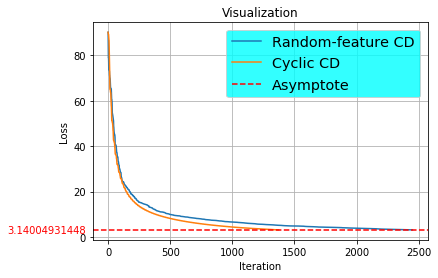

In [7]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

x1 = np.arange(0, len(L_rand))
x2 = np.arange(0, len(L_cyclic))
y1 = [L_aster] * len(x1)
fig, ax = plt.subplots()
ax.plot(x1, L_rand, label = 'Random-feature CD')
ax.plot(x2, L_cyclic, label = 'Cyclic CD')
ax.axhline(y=L_aster, c="r", ls='--', label = 'Asymptote')
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,L_aster, "3.14004931448", color="red", transform=trans, 
        ha="right", va="center")

legend = ax.legend(loc='upper right', fontsize='x-large')
legend.get_frame().set_facecolor('#00FFFF')

ax.set(xlabel='Iteration', ylabel='Loss',
       title='Visualization')
ax.grid()

fig.savefig("test.eps", bbox_inches='tight')
plt.show()

## * LBFGS

In [ ]:
def loss_lbfgs(w_j, X, y, w, j):
    l = 0
    w[j] = 0
    for i in xrange(0, len(X)):
        l += np.log(np.exp(-y[i] * (w.dot(X[i]) + w_j * X[i][j])) + 1)
    return -l

w_j,_,_ = fmin_l_bfgs_b(loss_lbfgs, w2[j], loss_f, args = (x2, y, w2, j))

# Debug

In [ ]:
w2 = np.array([uniform(0,1)]*len(x2[0]))

diff = 1
t = 0
while(diff > 0.00001):   
    L = loss(x2, y, w2) 
    
    j = randint(0, len(x2[0]) - 1)
    c = np.append(w2[:j], w2[j+1:])
    w2[j] = newton(loss_f, w2[j], loss_fprime, args = (x2, y, c, j), maxiter=100) 
    t += 1
    diff = abs(loss(x2, y, w2) - L)
    
def loss_f(w_j, X, y, c, j):
    res = 0
    for i in xrange(0, len(X)):
        res += np.exp(-y[i] * (c.dot(X[i][:j] + X[i][j+1:]) + w_j * X[i][j])) / (1 + np.exp(-y[i] * (c.dot(X[i][:j] + X[i][j+1:]) + w_j * X[i][j]))) * (-y[i] * X[i][j])
        
    return res

def loss_fprime(w_j, X, y, c, j):
    res = 0
    for i in xrange(0, len(X)):
        res += (y[i] * X[i][j])**2 * np.exp(-y[i] * (c.dot(X[i][:j] + X[i][j+1:]) + w_j * X[i][j]))
        
    return res    

np.seterr(divide='ignore', invalid='ignore', over='ignore')

# Evaluation

However, it is considered that the performance of cyclic coordinate selection method could be different
in some situations such as if the minimization only happens to certain coordinate or there is coupling
between different coordinates, the random-feature method would possibly perform better. Therefore,
different coordinate selection methods could be tried and implemented based on different data set.
For example, the Gauss-Southwell rule which updates coordinates with that of the largest directional
derivatives is certainly a better approach if there is a fit trade-off between the complexity of extra
computation per-iteration and convergence rate. As for the method to solve each ar gmin subproblem, similarly, there are many other adaptive and mature methods such as coordinate-gradient descent,
pathwise coordinate descent with shrink operator and so on that could be implemented and compared further.